In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mt


In [132]:
df=pd.read_csv("placement.csv")

In [133]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [135]:
df=df.iloc[:,1:]

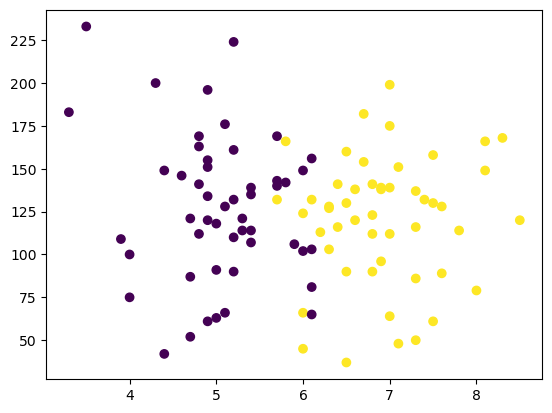

In [136]:
mt.scatter(df["cgpa"],df["iq"], c=df["placement"])


In [137]:
X= df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [138]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [139]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [140]:
X.shape

(100, 2)

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.1)

In [143]:
Ytest

18    0
16    0
61    1
8     0
74    1
26    1
89    0
12    0
5     1
96    0
Name: placement, dtype: int64

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
scaler=StandardScaler()
Xtrain=scaler.fit_transform(Xtrain)

In [146]:
Xtrain

array([[-0.009774  , -0.54289914],
       [ 0.51802195,  0.41935097],
       [ 0.69395393,  0.49953848],
       [-0.27367197,  0.47280931],
       [-1.85705982, -0.35579495],
       [-0.9773999 ,  0.87374686],
       [-0.71350193, -0.86364917],
       [-1.06536589,  0.49953848],
       [-0.71350193,  0.25897596],
       [ 0.34208997, -0.16869076],
       [-0.71350193, -0.32906578],
       [ 2.0134438 ,  1.22122606],
       [-0.80146792,  1.43505942],
       [-0.53756995, -0.40925329],
       [-1.15333189, -1.87935762],
       [-0.27367197,  0.55299682],
       [ 0.07819199, -1.53187841],
       [-1.41722986,  0.71337184],
       [ 0.25412397,  0.12533011],
       [-0.18570598,  0.52626765],
       [-0.009774  ,  0.0451426 ],
       [-0.53756995,  0.33916346],
       [ 1.22174988,  0.25897596],
       [ 0.69395393, -0.27560744],
       [ 0.16615798, -0.24887827],
       [ 0.78191992,  0.44608014],
       [ 0.86988591,  0.44608014],
       [-0.62553594, -0.03504491],
       [-0.9773999 ,

In [147]:
Xtest=scaler.fit_transform(Xtest)

In [148]:
Xtest

array([[-1.59926695, -0.6333558 ],
       [-0.53897947,  1.61053331],
       [ 1.31652362,  0.03619176],
       [ 0.25623614,  0.38001348],
       [ 0.78637988,  0.34382172],
       [ 1.05145175,  1.15813631],
       [-0.80405134,  0.28953408],
       [-0.36226489,  0.07238352],
       [ 1.13980904, -1.57434155],
       [-1.24583779, -1.68291683]])

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
clf= LogisticRegression()

In [151]:
clf.fit(Xtrain,Ytrain)

LogisticRegression()

In [152]:
Ypred = clf.predict(Xtest)

In [153]:
Ypred

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [154]:
Ytest

18    0
16    0
61    1
8     0
74    1
26    1
89    0
12    0
5     1
96    0
Name: placement, dtype: int64

In [155]:
from sklearn.metrics import accuracy_score

In [156]:
accuracy_score(Ytest,Ypred)

0.9

In [ ]:
!pip install mlxtend

In [160]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

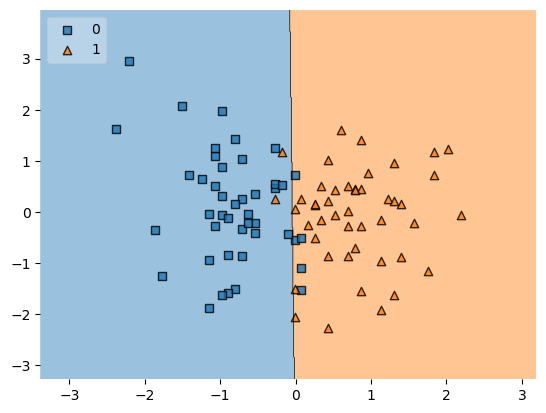

In [162]:
plot_decision_regions(Xtrain, Ytrain.values, clf=clf, legend=2)

In [166]:
import pickle